# The emotional loading of fake news

**Authors**: Nélia Bouzid and Léna Rebours

**Date**: May 2025

## 1. Library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from graphviz import Digraph

## 2. Directed Acyclic Graph

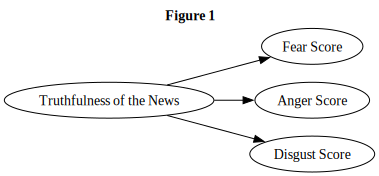

In [2]:
# Create DAG
dag = Digraph(format='png')
dag.attr(rankdir='LR', labelloc='t', labeljust='c', label='<<B>Figure 1</B>>')  # Specifiy that the arrows go left to firght and title creation

# Add nodes
dag.node('Fear', 'Fear Score')
dag.node('Anger', 'Anger Score')
dag.node('Disgust', 'Disgust Score')
dag.node('Fake', 'Truthfulness of the News')

# Add edges
dag.edge('Fake', 'Fear')
dag.edge('Fake', 'Anger')
dag.edge('Fake', 'Disgust')

# Display DAG inline
dag

## 3. Data import

In [3]:
df = pd.read_csv("news_emotion_automation_1000.csv")

In [4]:
df.dropna()
df # Does not contain any empty value

,title,text,subject,date,fake,explanation,fear_score,disgust_score,anger_score
0,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews,"July 27, 2016",0,The headline uses neutral language and focuses...,0.0,0.0,0.0
1,"Trump denounces attack in London, urges 'proac...",WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"September 15, 2017",0,The headline uses neutral language to report a...,0.0,0.0,0.0
2,"Trapped by landmines and a creek, Rohingya lan...","COX S BAZAR, Bangladesh Reuters) - Until late ...",worldnews,"September 13, 2017",0,"The headline uses words like ""trapped,"" ""langu...",0.7,0.3,0.5
3,U.S. ends temporary protected status for Sudan...,WASHINGTON (Reuters) - The United States is en...,worldnews,"September 18, 2017",0,The headline is presented in a neutral and fac...,0.0,0.0,0.0
4,"OPEN SOCIETY: Soros-backed, Anti-Trump Immigra...",21st Century Wire says This week a US presiden...,US_News,"January 31, 2017",1,"The headline uses charged language such as ""So...",0.0,0.6,0.7
...,...,...,...,...,...,...,...,...,...
995,Hillary Clinton CRUSHES Donald Trump In This ...,As polls show Clinton beating Donald Trump in ...,News,"June 22, 2016",1,"The headline uses strong, positive language (""...",0.0,0.0,0.0
996,AWESOME! WATCH REPUBLICAN STUDENTS Protest Awa...,"In a rare move, a throng of Republican student...",politics,"Apr 15, 2017",1,The headline uses enthusiastic and positive la...,0.0,0.0,0.0
997,Trump to host South Korea president June 29-30...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 13, 2017",0,The headline is presented in a straightforward...,0.0,0.0,0.0
998,BUCKLE UP AMERICA: Dinesh D’Souza’s Is About T...,No one exposes the truth about the corrupt and...,politics,"Mar 6, 2016",1,The headline uses urgent and provocative langu...,0.6,0.3,0.8


## 4. Data description

In [5]:
# Font settings
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': 'Times New Roman',
    'font.size': 16,
    'axes.facecolor': 'white', 
    'figure.facecolor': 'white',
})

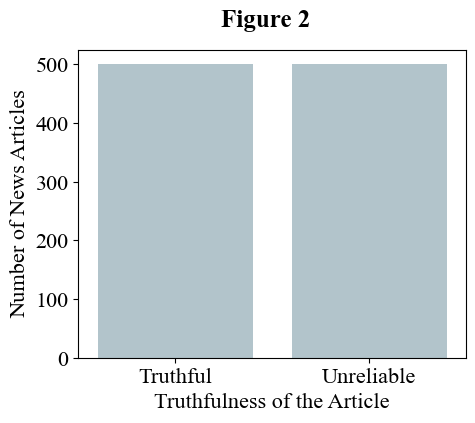

In [6]:
# Creates a barplot showing the truthfulness of the articles of the dataset 
plt.figure(figsize=(5, 4)) # Set figure size
sns.countplot(x='fake', data=df, color='#AEC6CF')
plt.suptitle('Figure 2', fontsize=18, fontweight='bold')
plt.xlabel('Truthfulness of the Article', fontsize=16)
plt.ylabel('Number of News Articles', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Truthful', 'Unreliable'])

plt.savefig('Figure2.jpg', dpi=600, bbox_inches='tight') # Save the figure
plt.show()

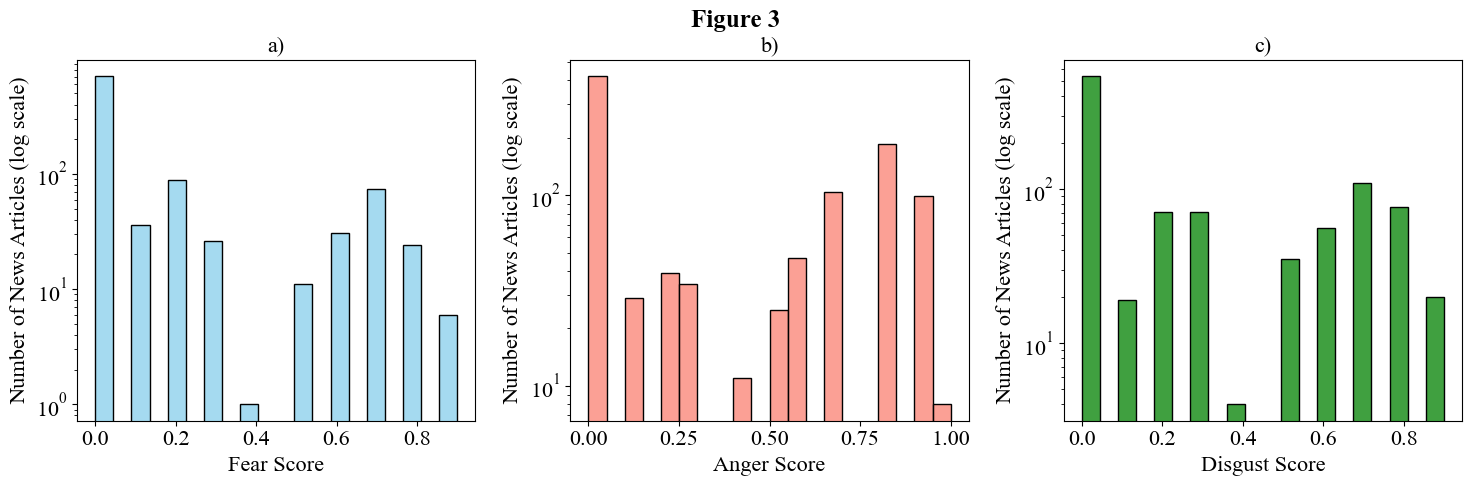

In [7]:
# Create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # wider layout for 1 row
fig.suptitle('Figure 3', fontsize=18, fontweight='bold')

# Histogram: number of news per fear score
sns.histplot(df['fear_score'], bins=20, ax=axes[0], color='skyblue')
axes[0].set_title('a)', fontsize=16)
axes[0].set_xlabel('Fear Score', fontsize=16)
axes[0].set_ylabel('Number of News Articles (log scale)', fontsize=16)
axes[0].set_yscale('log')

# Histogram: number of news per anger score
sns.histplot(df['anger_score'], bins=20, ax=axes[1], color='salmon')
axes[1].set_title('b)', fontsize=16)
axes[1].set_xlabel('Anger Score', fontsize=16)
axes[1].set_ylabel('Number of News Articles (log scale)', fontsize=16)
axes[1].set_yscale('log')

# Histogram: number of news per disgust
sns.histplot(df['disgust_score'], bins=20, ax=axes[2], color='green')
axes[2].set_title('c)', fontsize=16)
axes[2].set_xlabel('Disgust Score', fontsize=16)
axes[2].set_ylabel('Number of News Articles (log scale)', fontsize=16)
axes[2].set_yscale('log')

fig.tight_layout() # Adjusts layout to fit all elements
plt.savefig('Figure3.jpg', dpi=600, bbox_inches='tight') # Save the figure
fig.subplots_adjust(top=0.88)  # to make room for the suptitle

C:\Users\bouzi\AppData\Local\Temp\ipykernel_17236\1545605095.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(labels=['Truthful', 'Unreliable'], fontsize=14)
C:\Users\bouzi\AppData\Local\Temp\ipykernel_17236\1545605095.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(labels=['Truthful', 'Unreliable'], fontsize=14)
C:\Users\bouzi\AppData\Local\Temp\ipykernel_17236\1545605095.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(labels=['Truthful', 'Unreliable'], fontsize=14)


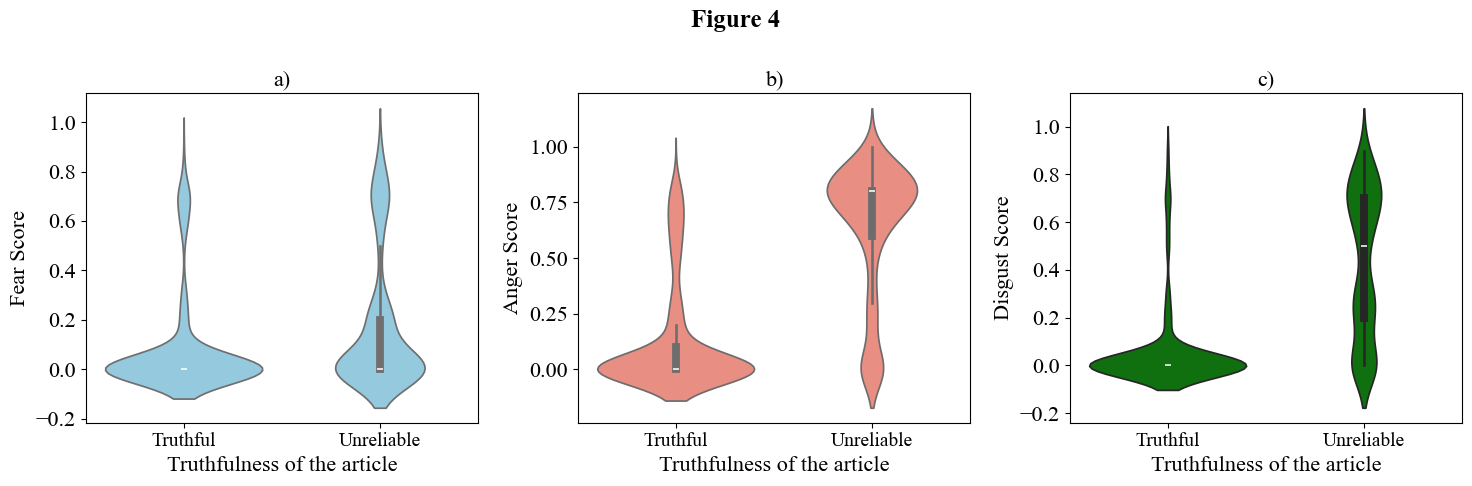

In [8]:
# We are now going to visually compare the distributions of emotional scores—anger, fear, and disgust—
# based on the binary "fake news / real news" label

# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Figure 4', fontsize=18, fontweight='bold')

# Violin plot representing fear scores depending on the unreliable label
sns.violinplot(x='fake', y='fear_score', data=df, ax=axes[0], color='skyblue', inner='box')
axes[0].set_title('a)', fontsize=16)
axes[0].set_xlabel('Truthfulness of the article', fontsize=16)
axes[0].set_ylabel('Fear Score', fontsize=16)
axes[0].set_xticklabels(labels=['Truthful', 'Unreliable'], fontsize=14)

# Violin plot representing anger scores depending on the unreliable label
sns.violinplot(x='fake', y='anger_score', data=df, ax=axes[1], color='salmon', inner='box')
axes[1].set_title('b)', fontsize=16)
axes[1].set_xlabel('Truthfulness of the article', fontsize=16)
axes[1].set_ylabel('Anger Score', fontsize=16)
axes[1].set_xticklabels(labels=['Truthful', 'Unreliable'], fontsize=14)

# Violin plot representing disgust scores depending on the unreliable label
sns.violinplot(x='fake', y='disgust_score', data=df, ax=axes[2], color='green', inner='box')
axes[2].set_title('c)', fontsize=16)
axes[2].set_xlabel('Truthfulness of the article', fontsize=16)
axes[2].set_ylabel('Disgust Score', fontsize=16)
axes[2].set_xticklabels(labels=['Truthful', 'Unreliable'], fontsize=14)

plt.tight_layout() # Adjusts layout to fit all elements
plt.savefig('Figure4.jpg', dpi=600, bbox_inches='tight') # Save the figure
plt.show()


## 5. Data standardization

In [9]:
# Column standardization
df_scale = df

# Standardizing each continuous or ordinal variable
for var in ['fear_score', 'anger_score', 'disgust_score']:

    df_scale.loc[:, var] = df_scale[var] / df_scale[var].std()
    df_scale.loc[:, var] = df_scale[var] - df_scale[var].mean()

## 6. Data modeling

In [10]:
# We are now performing a multivariate logistic regression

# Logistic regression using statsmodels
model = smf.logit(formula="fake ~ disgust_score + anger_score + fear_score", data=df_scale).fit()

# Display the summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.415928
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   fake   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.3999
Time:                        08:51:15   Log-Likelihood:                -415.93
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                7.585e-120
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1164      0.092      1.268      0.205      -0.064       0.296
disgust_score     0.

C:\Users\bouzi\AppData\Local\Temp\ipykernel_17236\735271202.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefs[i], y_pos[i],
C:\Users\bouzi\AppData\Local\Temp\ipykernel_17236\735271202.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xerr=ci_error[i],  # Error for each coefficient


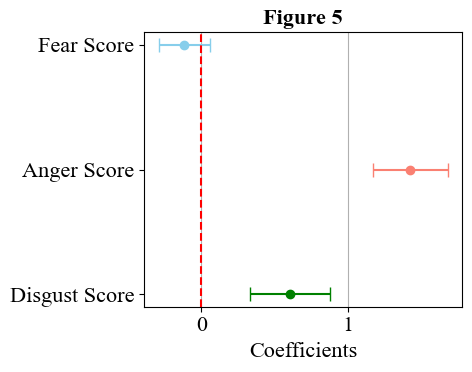

In [11]:
# Coefficients and confidence intervals
coefs = model.params[1:4]  # Selects the coefficients excluding the intercept (index 0)
ci = model.conf_int(alpha=0.05).iloc[1:4]  # Selects the confidence intervals excluding the intercept (index 0)
ci_error = (ci[1] - ci[0]) / 2  # Calculates the error for error bars

# Define the variable names
variables = ["Disgust Score", "Anger Score", "Fear Score"]

y_pos = range(len(variables))

colors = ['green', 'salmon', 'skyblue']  # One color per coefficient 

plt.figure(figsize=(5, 4))
plt.title('Figure 5', fontsize=16, fontweight='bold')

# Plot each coefficient separately with its own color
for i in range(len(coefs)):
    plt.errorbar(
        coefs[i], y_pos[i], 
        xerr=ci_error[i],  # Error for each coefficient
        fmt='o', color=colors[i], capsize=5
    )

# Add labels and reference line
plt.yticks(y_pos, variables)
plt.axvline(x=0, linestyle='--', color='red')  # Vertical reference line
plt.xlabel('Coefficients')
plt.grid(axis='x')
plt.tight_layout()

# Save and show
plt.savefig('Figure5.jpg', dpi=300, bbox_inches='tight')
plt.show()